In [1]:
import xgboost
import shap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv("C:\\Users\\Nicol\\Desktop\\bike_rental.csv")

c:\Users\Nicol\anaconda3\envs\tensorflow\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X = df.drop(columns=['cnt'])
y = df['cnt']

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting
model1 = xgboost.XGBRegressor(random_state=42).fit(X_train,y_train)

# Improved NN
model2 = Sequential()
model2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')
model2.fit(X_train, y_train, epochs=50)


Epoch 1/50
435/435 [==============================] - 1s 1ms/step - loss: 30622.7148
Epoch 2/50
435/435 [==============================] - 1s 1ms/step - loss: 29201.8945
Epoch 3/50
435/435 [==============================] - 1s 1ms/step - loss: 26569.5469
Epoch 4/50
435/435 [==============================] - 1s 1ms/step - loss: 23840.5820
Epoch 5/50
435/435 [==============================] - 1s 1ms/step - loss: 21877.9316
Epoch 6/50
435/435 [==============================] - 1s 1ms/step - loss: 20098.4590
Epoch 7/50
435/435 [==============================] - 1s 1ms/step - loss: 18505.6738
Epoch 8/50
435/435 [==============================] - 1s 2ms/step - loss: 16695.8848
Epoch 9/50
435/435 [==============================] - 1s 2ms/step - loss: 16133.5479
Epoch 10/50
435/435 [==============================] - 1s 2ms/step - loss: 15071.4053
Epoch 11/50
435/435 [==============================] - 1s 2ms/step - loss: 14322.2832
Epoch 12/50
435/435 [==============================] - 1s 2ms/s

In [4]:
# Predicting results

preds1 = model1.predict(X)
preds2 = model2.predict(X)

explainer1 = shap.Explainer(model1)
explainer2 = shap.DeepExplainer(model2, X.values)

shap_values1 = explainer1(X)
shap_values2 = explainer2.shap_values(X.values)


keras is no longer supported, please use tf.keras instead.
You have provided over 5k background samples! For better performance consider using smaller random sample.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [5]:
'''
with open("XGB_vs_NN.txt", "w") as f:
    for i in range(0, len(y)):
        f.write(str(preds1[i]))
        f.write(", ")
        f.write(str(preds2[i]))
        f.write("\n")
'''

'\nwith open("XGB_vs_NN.txt", "w") as f:\n    for i in range(0, len(y)):\n        f.write(str(preds1[i]))\n        f.write(", ")\n        f.write(str(preds2[i]))\n        f.write("\n")\n'

In [6]:
# Normalizing data

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply the scaler to every column in the dataframe
stdDf = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

stdX = stdDf.drop(columns=['cnt'])
stdY = stdDf['cnt']


In [7]:
stdX_train, stdX_test, stdy_train, stdy_test = train_test_split(stdX, stdY, test_size=0.2, random_state=42)

# Gradient Boosting
stdmodel1 = xgboost.XGBRegressor(random_state=42).fit(stdX_train,stdy_train)

# NN
stdmodel2 = Sequential()
stdmodel2.add(Dense(64, input_dim=stdX_train.shape[1], activation='relu'))
stdmodel2.add(Dense(1))
stdmodel2.compile(loss='mse', optimizer='adam')
stdmodel2.fit(stdX_train, stdy_train, epochs=50)

Epoch 1/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0228
Epoch 2/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0178
Epoch 3/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0164
Epoch 4/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0156A: 0s - loss
Epoch 5/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0152
Epoch 6/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0144
Epoch 7/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0137
Epoch 8/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0130
Epoch 9/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0123
Epoch 10/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0119
Epoch 11/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0114
Epoch 12/50
435/435 [==============================] - 1s 2ms/step - loss: 0.0113
Epoch 13/50
4

In [8]:
stdpreds1 = model1.predict(stdX)
stdpreds2 = model2.predict(stdX)

stdexplainer1 = shap.Explainer(stdmodel1)
stdexplainer2 = shap.DeepExplainer(stdmodel2, stdX.values)

stdshap_values1 = explainer1(stdX)
stdshap_values2 = explainer2.shap_values(stdX.values)

You have provided over 5k background samples! For better performance consider using smaller random sample.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [9]:
with open("bike_rental_XBG_NN.txt", "w") as f:
    # header
    f.write("XGBoost , NN")
    colNames = list(df.columns)
    for el in colNames:
        f.write(", ")
        f.write(el)
    for i in range(0, len(y)):
        f.write(str(preds1[i]))
        f.write(", ")
        f.write(str(preds2[i]))
        f.write(", ")
        tmp_lst1 = []
        tmp_lst2 = []
        for j in range(0, len(shap_values1[i].values)):
            tmp_lst1.append(str(shap_values1[i].values[j]))
            tmp_lst1.append(", ")
        tmp_strng1 = ''.join(tmp_lst1)
        f.write(tmp_strng1)
        tmp_lst2 = []
        for j in range(0, len(shap_values2[0][i])):
            tmp_lst2.append(str(shap_values2[0][i][j]))
            tmp_lst2.append(", ")
        tmp_strng2 = ''.join(tmp_lst2)
        nw_ts2 = tmp_strng2[:-2]
        f.write(nw_ts2)
        f.write("\n")

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [11]:
N = len(X)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [12]:
shap_diffs = []
for i in range(0, len(y)):
    cur_shaps = []
    for j in range(0,len(shap_values1[i].values)):
        cur_d = shap_values1[i].values[j] - shap_values2[0][i][j]
        cur_shaps.append(cur_d)
    shap_diffs.append(cur_shaps)

In [13]:
df_shap = pd.DataFrame(shap_diffs)
feature_names = list(X.columns)
df_shap.columns = feature_names

In [14]:
# Load libraries and modules
import pandas as pd
from sklearn import preprocessing
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn.metrics.cluster import normalized_mutual_info_score
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [15]:
from sklearn.metrics import silhouette_score

# Extract the features into X
X1 = df_shap.iloc[:, 1:].values

# Calculate the silhouette score for different numbers of clusters
scores = []
for n_clusters in range(2, 20):
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Find the optimal number of clusters
optimal_n_clusters = np.argmax(scores) + 2
print("Optimal number of clusters =", optimal_n_clusters)


For n_clusters = 2 The average silhouette_score is : 0.24156159146850442
For n_clusters = 3 The average silhouette_score is : 0.23200077272845573
For n_clusters = 4 The average silhouette_score is : 0.23590747306456064
For n_clusters = 5 The average silhouette_score is : 0.21677055754184263
For n_clusters = 6 The average silhouette_score is : 0.2171649150791836
For n_clusters = 7 The average silhouette_score is : 0.22353206850448692
For n_clusters = 8 The average silhouette_score is : 0.19253095362167588
For n_clusters = 9 The average silhouette_score is : 0.1872924065030755
For n_clusters = 10 The average silhouette_score is : 0.18371953155442464
For n_clusters = 11 The average silhouette_score is : 0.18562048305020723
For n_clusters = 12 The average silhouette_score is : 0.18305599541829415
For n_clusters = 13 The average silhouette_score is : 0.1746217462435761
For n_clusters = 14 The average silhouette_score is : 0.1734318145494673
For n_clusters = 15 The average silhouette_score i

In [16]:
kmeans = KMeans(n_clusters=optimal_n_clusters)
kmeans.fit(df_shap)
labels=kmeans.labels_
df_shap['cluster'] = labels
print(kmeans.cluster_centers_)

[[-1.71071080e+01  3.13115290e-01  2.12176787e-03  2.79782424e-01
   1.54162921e+01 -4.51083834e-02  4.09785568e-01 -8.52875892e-01
  -7.56394208e-01  8.81369548e+00 -5.58949346e-01  8.42709657e-01
  -2.60920073e-01]
 [ 4.52640972e+01  6.85271847e-01 -5.33660670e-03 -1.47689360e+00
  -3.49913395e+01  1.02073237e-01 -3.98315389e-02  6.75411971e-01
   1.63912855e+00 -2.40919781e+01 -6.55617767e+00 -6.83814640e-01
  -5.87454391e-01]]


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

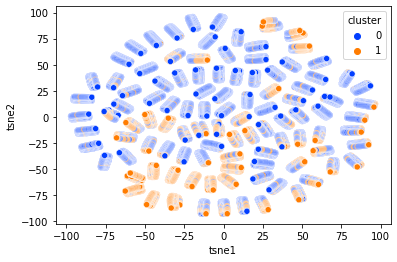

In [17]:
# t-SNE and scatterplot on original dataset, coloring it basing on cluster beloning

from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df2 = pd.DataFrame(X_tsne, columns=['tsne1','tsne2'])
df2['label'] = y
df2['cluster'] = df_shap['cluster']

sns.scatterplot(data=df2, x='tsne1', y='tsne2', hue='cluster', palette='bright')


In [18]:
counts = df2['cluster'].value_counts()
print(counts)

0    12438
1     4941
Name: cluster, dtype: int64


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


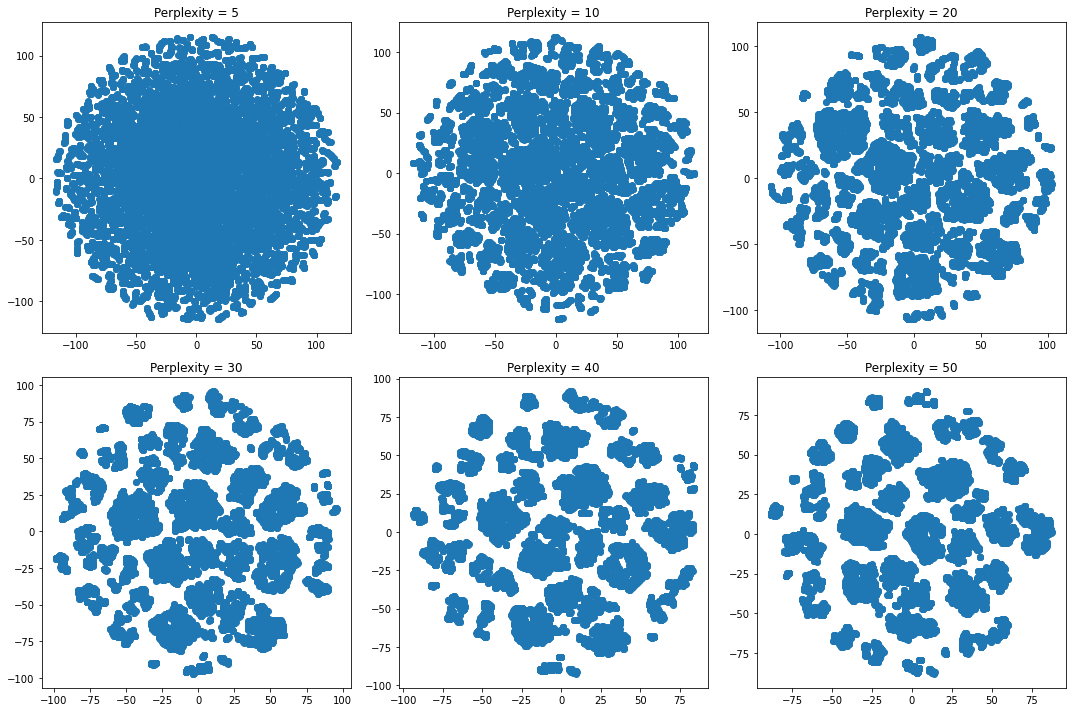

In [19]:
# Trying more perplexity values

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

perplexities = [5, 10, 20, 30, 40, 50]
X_tsne = {}
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne[i] = tsne.fit_transform(stdX)

# plot the results
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.ravel()

for i, perplexity in enumerate(perplexities):
    axs[i].scatter(X_tsne[i][:, 0], X_tsne[i][:, 1])
    axs[i].set_title("Perplexity = {}".format(perplexity))

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

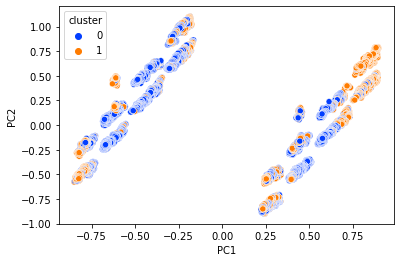

In [20]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

# apply PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(stdX)

# create a pandas dataframe for the new dataset with 2 principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df_shap['cluster']

# plot the results
import seaborn as sns
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='bright')


In [21]:
from sklearn.metrics import mean_squared_error

preds1 = model1.predict(X_test)
preds2 = model2.predict(X_test)

mse1 = mean_squared_error(y_test, preds1)
mse2 = mean_squared_error(y_test, preds2)

print("MSE1: {}, MSE2:{}".format(mse1, mse2))

MSE1: 1448.3283695021405, MSE2:6445.4371456964445
